<a href="https://colab.research.google.com/github/razzlestorm/DS-Unit-1-Sprint-1-Dealing-With-Data/blob/master/module3-make-explanatory-visualizations/Jerimiah_Willhite_LS_DS_123_Make_Explanatory_Visualizations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

_Lambda School Data Science_

# Make Explanatory Visualizations

### Objectives

- identify misleading visualizations and how to fix them
- use Seaborn to visualize distributions and relationships with continuous and discrete variables
- add emphasis and annotations to transform visualizations from exploratory to explanatory
- remove clutter from visualizations

### Links

- [How to Spot Visualization Lies](https://flowingdata.com/2017/02/09/how-to-spot-visualization-lies/)
- [Visual Vocabulary - Vega Edition](http://ft.com/vocabulary)
- [Choosing a Python Visualization Tool flowchart](http://pbpython.com/python-vis-flowchart.html)
- [Searborn example gallery](http://seaborn.pydata.org/examples/index.html) & [tutorial](http://seaborn.pydata.org/tutorial.html)
- [Strong Titles Are The Biggest Bang for Your Buck](http://stephanieevergreen.com/strong-titles/)
- [Remove to improve (the data-ink ratio)](https://www.darkhorseanalytics.com/blog/data-looks-better-naked)
- [How to Generate FiveThirtyEight Graphs in Python](https://www.dataquest.io/blog/making-538-plots/)

# Avoid Misleading Visualizations

Did you find/discuss any interesting misleading visualizations in your Walkie Talkie?

## What makes a visualization misleading?

[5 Ways Writers Use Misleading Graphs To Manipulate You](https://venngage.com/blog/misleading-graphs/)

## Two y-axes

<img src="https://kieranhealy.org/files/misc/two-y-by-four-sm.jpg" width="800">
 
 Other Examples: 
 - [Spurious Correlations](https://tylervigen.com/spurious-correlations)
 - <https://blog.datawrapper.de/dualaxis/>
 - <https://kieranhealy.org/blog/archives/2016/01/16/two-y-axes/>
 - <http://www.storytellingwithdata.com/blog/2016/2/1/be-gone-dual-y-axis>

##  Y-axis doesn't start at zero.

<img src="https://i.pinimg.com/originals/22/53/a9/2253a944f54bb61f1983bc076ff33cdd.jpg" width="600">

## Pie Charts are bad

<img src="https://i1.wp.com/flowingdata.com/wp-content/uploads/2009/11/Fox-News-pie-chart.png?fit=620%2C465&ssl=1" width="600">

## Pie charts that omit data are extra bad
 
- A guy makes a misleading chart that goes viral

 What does this chart imply at first glance? You don't want your user to have to do a lot of work in order to be able to interpret you graph correctly. You want that first-glance conclusions to be the correct ones.

 <img src="https://pbs.twimg.com/media/DiaiTLHWsAYAEEX?format=jpg&name=medium" width='600'>
 
 <https://twitter.com/michaelbatnick/status/1019680856837849090?lang=en>
 
- It gets picked up by overworked journalists (assuming incompetency before malice)
 
 <https://www.marketwatch.com/story/this-1-chart-puts-mega-techs-trillions-of-market-value-into-eye-popping-perspective-2018-07-18>
 
- Even after the chart's implications have been refuted, it's hard a bad (although compelling) visualization from being passed around.

 <https://www.linkedin.com/pulse/good-bad-pie-charts-karthik-shashidhar/>

**["yea I understand a pie chart was probably not the best choice to present this data."](https://twitter.com/michaelbatnick/status/1037036440494985216)**

## Pie Charts that compare unrelated things are next-level extra bad

<img src="http://www.painting-with-numbers.com/download/document/186/170403+Legalizing+Marijuana+Graph.jpg" width="600">


## Be careful about how you use volume to represent quantities:

radius vs diameter vs volume

<img src="https://static1.squarespace.com/static/5bfc8dbab40b9d7dd9054f41/t/5c32d86e0ebbe80a25873249/1546836082961/5474039-25383714-thumbnail.jpg?format=1500w" width="600">

## Don't cherrypick timelines or specific subsets of your data:

<img src="https://wattsupwiththat.com/wp-content/uploads/2019/02/Figure-1-1.png" width="600">

Look how specifically the writer has selected what years to show in the legend on the right side.

<https://wattsupwiththat.com/2019/02/24/strong-arctic-sea-ice-growth-this-year/>

Try the tool that was used to make the graphic for yourself

<http://nsidc.org/arcticseaicenews/charctic-interactive-sea-ice-graph/>
                                                                                           

## Use Relative units rather than Absolute Units

<img src="https://imgs.xkcd.com/comics/heatmap_2x.png" width="600">

## Avoid 3D graphs unless having the extra dimension is effective

Usually you can Split 3D graphs into multiple 2D graphs

3D graphs that are interactive can be very cool. (See Plotly and Bokeh)

<img src="https://thumbor.forbes.com/thumbor/1280x868/https%3A%2F%2Fblogs-images.forbes.com%2Fthumbnails%2Fblog_1855%2Fpt_1855_811_o.jpg%3Ft%3D1339592470" width="600">

## Don't go against typical conventions

<img src="http://www.callingbullshit.org/twittercards/tools_misleading_axes.png" width="600">

# Tips for choosing an appropriate visualization:

## Use Appropriate "Visual Vocabulary"

[Visual Vocabulary - Vega Edition](http://ft.com/vocabulary)

## What are the properties of your data?
- Is your primary variable of interest continuous or discrete?
- Is in wide or long (tidy) format?
- Does your visualization involve multiple variables?
- How many dimensions do you need to include on your plot?

Can you express the main idea of your visualization in a single sentence?

How hard does your visualization make the user work in order to draw the intended conclusion?

## Which Visualization tool is most appropriate? 

[Choosing a Python Visualization Tool flowchart](http://pbpython.com/python-vis-flowchart.html)

## Anatomy of a Matplotlib Plot

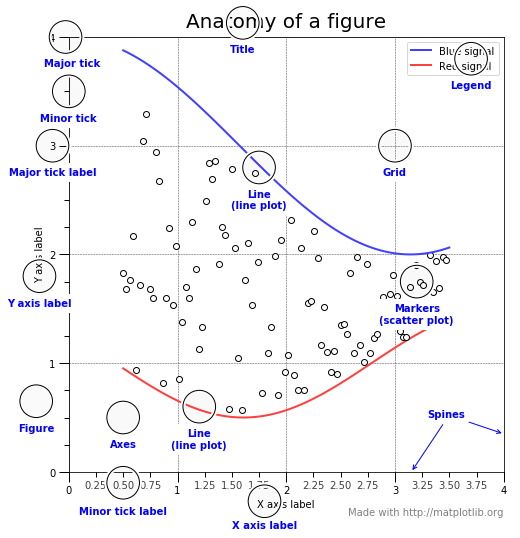

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import AutoMinorLocator, MultipleLocator, FuncFormatter

np.random.seed(19680801)

X = np.linspace(0.5, 3.5, 100)
Y1 = 3+np.cos(X)
Y2 = 1+np.cos(1+X/0.75)/2
Y3 = np.random.uniform(Y1, Y2, len(X))

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(1, 1, 1, aspect=1)


def minor_tick(x, pos):
    if not x % 1.0:
        return ""
    return "%.2f" % x

ax.xaxis.set_major_locator(MultipleLocator(1.000))
ax.xaxis.set_minor_locator(AutoMinorLocator(4))
ax.yaxis.set_major_locator(MultipleLocator(1.000))
ax.yaxis.set_minor_locator(AutoMinorLocator(4))
ax.xaxis.set_minor_formatter(FuncFormatter(minor_tick))

ax.set_xlim(0, 4)
ax.set_ylim(0, 4)

ax.tick_params(which='major', width=1.0)
ax.tick_params(which='major', length=10)
ax.tick_params(which='minor', width=1.0, labelsize=10)
ax.tick_params(which='minor', length=5, labelsize=10, labelcolor='0.25')

ax.grid(linestyle="--", linewidth=0.5, color='.25', zorder=-10)

ax.plot(X, Y1, c=(0.25, 0.25, 1.00), lw=2, label="Blue signal", zorder=10)
ax.plot(X, Y2, c=(1.00, 0.25, 0.25), lw=2, label="Red signal")
ax.plot(X, Y3, linewidth=0,
        marker='o', markerfacecolor='w', markeredgecolor='k')

ax.set_title("Anatomy of a figure", fontsize=20, verticalalignment='bottom')
ax.set_xlabel("X axis label")
ax.set_ylabel("Y axis label")

ax.legend()


def circle(x, y, radius=0.15):
    from matplotlib.patches import Circle
    from matplotlib.patheffects import withStroke
    circle = Circle((x, y), radius, clip_on=False, zorder=10, linewidth=1,
                    edgecolor='black', facecolor=(0, 0, 0, .0125),
                    path_effects=[withStroke(linewidth=5, foreground='w')])
    ax.add_artist(circle)


def text(x, y, text):
    ax.text(x, y, text, backgroundcolor="white",
            ha='center', va='top', weight='bold', color='blue')

# Minor tick
circle(0.50, -0.10)
text(0.50, -0.32, "Minor tick label")

# Major tick
circle(-0.03, 4.00)
text(0.03, 3.80, "Major tick")

# Minor tick
circle(0.00, 3.50)
text(0.00, 3.30, "Minor tick")

# Major tick label
circle(-0.15, 3.00)
text(-0.15, 2.80, "Major tick label")

# X Label
circle(1.80, -0.27)
text(1.80, -0.45, "X axis label")

# Y Label
circle(-0.27, 1.80)
text(-0.27, 1.6, "Y axis label")

# Title
circle(1.60, 4.13)
text(1.60, 3.93, "Title")

# Blue plot
circle(1.75, 2.80)
text(1.75, 2.60, "Line\n(line plot)")

# Red plot
circle(1.20, 0.60)
text(1.20, 0.40, "Line\n(line plot)")

# Scatter plot
circle(3.20, 1.75)
text(3.20, 1.55, "Markers\n(scatter plot)")

# Grid
circle(3.00, 3.00)
text(3.00, 2.80, "Grid")

# Legend
circle(3.70, 3.80)
text(3.70, 3.60, "Legend")

# Axes
circle(0.5, 0.5)
text(0.5, 0.3, "Axes")

# Figure
circle(-0.3, 0.65)
text(-0.3, 0.45, "Figure")

color = 'blue'
ax.annotate('Spines', xy=(4.0, 0.35), xytext=(3.3, 0.5),
            weight='bold', color=color,
            arrowprops=dict(arrowstyle='->',
                            connectionstyle="arc3",
                            color=color))

ax.annotate('', xy=(3.15, 0.0), xytext=(3.45, 0.45),
            weight='bold', color=color,
            arrowprops=dict(arrowstyle='->',
                            connectionstyle="arc3",
                            color=color))

ax.text(4.0, -0.4, "Made with http://matplotlib.org",
        fontsize=10, ha="right", color='.5')

plt.show()

#Simple Web Scraper with IMBD

In [2]:
from requests import get

url = 'https://www.imdb.com/title/tt6105098/ratings?ref_=tt_ov_rt'
response = get(url)
print(response.text[:500])











<!DOCTYPE html>
<html
    xmlns:og="http://ogp.me/ns#"
    xmlns:fb="http://www.facebook.com/2008/fbml">
    <head>
         
        <meta charset="utf-8">
        <meta http-equiv="X-UA-Compatible" content="IE=edge">

    <meta name="apple-itunes-app" content="app-id=342792525, app-argument=imdb:///title/tt6105098?src=mdot">



        <script type="text/javascript">var IMDbTimer={starttime: new Date().getTime(),pt:'java'};</script>

<script>
    if (typeof uet == 'function') {
     


In [3]:
from bs4 import BeautifulSoup
import pandas as pd

html_soup = BeautifulSoup(response.text, 'html.parser')
type(html_soup)

bs4.BeautifulSoup

In [4]:
vote_container = html_soup.find_all('div', class_ = 'leftAligned')
vote_container[1:11]

[<div class="leftAligned">10,732</div>,
 <div class="leftAligned">6,909</div>,
 <div class="leftAligned">12,673</div>,
 <div class="leftAligned">13,514</div>,
 <div class="leftAligned">7,225</div>,
 <div class="leftAligned">3,325</div>,
 <div class="leftAligned">1,532</div>,
 <div class="leftAligned">1,036</div>,
 <div class="leftAligned">786</div>,
 <div class="leftAligned">2,635</div>]

In [0]:
votes = [containers.text for containers in vote_container][1:11]

In [6]:
urls = ['https://www.imdb.com/title/tt6105098/ratings?ref_=tt_ov_rt',     # Lion King (2019)
        'https://www.imdb.com/title/tt0110357/ratings?ref_=tt_ov_rt',     # Lion King (1994)
        'https://www.imdb.com/title/tt6139732/ratings?ref_=tt_ov_rt',     # Aladdin (2019)
        'https://www.imdb.com/title/tt0103639/ratings?ref_=tt_ov_rt']     # Aladdin (1992) w/ Robin Williams
votes_list = []
for url in urls:
    # Get raw HTML response
    response = get(url)
    
    # Convert to BS Object
    html_soup = BeautifulSoup(response.text, 'html.parser')
    
    # Find vote containers and extract star ratings
    vote_containers = html_soup.find_all('div', class_ = 'leftAligned')
    votes = [containers.text for containers in vote_containers][1:11]
    
    # Append to initial list
    votes_list.append(votes)
    
print(votes_list)

[['10,732', '6,909', '12,673', '13,514', '7,225', '3,325', '1,532', '1,036', '786', '2,635'], ['254,699', '219,257', '213,611', '100,744', '33,087', '13,246', '5,344', '3,010', '1,969', '4,956'], ['14,800', '11,772', '22,729', '20,311', '8,620', '3,342', '1,512', '915', '666', '2,395'], ['58,914', '61,231', '111,139', '61,573', '20,592', '7,057', '2,593', '1,199', '689', '1,249']]


In [7]:

movies = ['The Lion King (2019)', 'The Lion King (1994)', 'Aladdin (2019)', 'Aladdin (1992)']
df = pd.DataFrame(votes_list)
df = df.T
df.columns = movies
df = df.apply(lambda x: x.str.replace(',',''))
df['Star Rating'] = range(1,11)[::-1]
df

#could also have converted into tidy format first, and then concated into a df

,The Lion King (2019),The Lion King (1994),Aladdin (2019),Aladdin (1992),Star Rating
0,10732,254699,14800,58914,10
1,6909,219257,11772,61231,9
2,12673,213611,22729,111139,8
3,13514,100744,20311,61573,7
4,7225,33087,8620,20592,6
5,3325,13246,3342,7057,5
6,1532,5344,1512,2593,4
7,1036,3010,915,1199,3
8,786,1969,666,689,2
9,2635,4956,2395,1249,1


In [8]:
#convert df into tidy-format
df_tidy = df.melt(id_vars='Star Rating')
df_tidy = df_tidy.rename(columns={'variable': 'Movie', 'value': 'Number of Votes'})
df_tidy['Number of Votes'] = pd.to_numeric(df_tidy['Number of Votes'])
df_tidy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 3 columns):
Star Rating        40 non-null int64
Movie              40 non-null object
Number of Votes    40 non-null int64
dtypes: int64(2), object(1)
memory usage: 1.0+ KB


In [9]:
df_tidy['Vote Percent'] = df_tidy.groupby('Movie')['Number of Votes'].apply(lambda x: x / x.sum() * 100)
df_tidy.head()

,Star Rating,Movie,Number of Votes,Vote Percent
0,10,The Lion King (2019),10732,17.777925
1,9,The Lion King (2019),6909,11.444995
2,8,The Lion King (2019),12673,20.993258
3,7,The Lion King (2019),13514,22.386403
4,6,The Lion King (2019),7225,11.968460


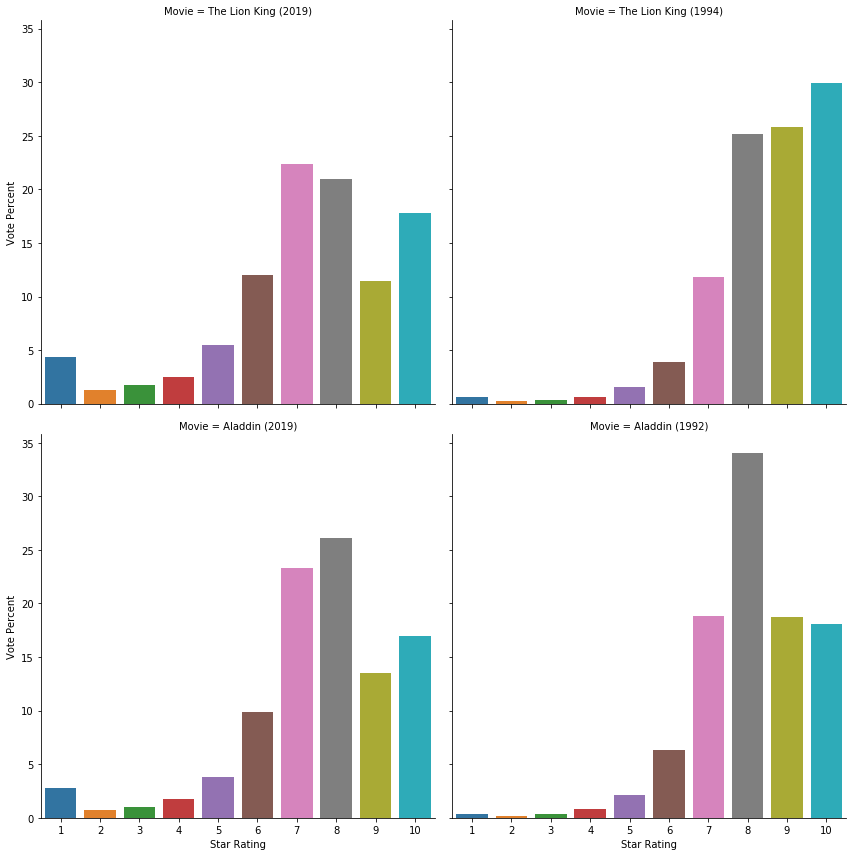

In [10]:
import seaborn as sns

sns.catplot(x='Star Rating', y='Vote Percent', col='Movie', col_wrap=2, height=6, kind='bar', data=df_tidy);

# Making Explanatory Visualizations with Seaborn

Today we will reproduce this [example by FiveThirtyEight:](https://fivethirtyeight.com/features/al-gores-new-movie-exposes-the-big-flaw-in-online-movie-ratings/)



In [11]:
from IPython.display import display, Image

url = 'https://fivethirtyeight.com/wp-content/uploads/2017/09/mehtahickey-inconvenient-0830-1.png'
example = Image(url=url, width=400)

display(example)

Using this data: https://github.com/fivethirtyeight/data/tree/master/inconvenient-sequel

Links
- [Strong Titles Are The Biggest Bang for Your Buck](http://stephanieevergreen.com/strong-titles/)
- [Remove to improve (the data-ink ratio)](https://www.darkhorseanalytics.com/blog/data-looks-better-naked)
- [How to Generate FiveThirtyEight Graphs in Python](https://www.dataquest.io/blog/making-538-plots/)

## Make prototypes

This  helps us understand the problem

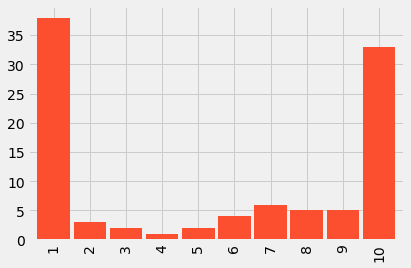

In [12]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


plt.style.use('fivethirtyeight')

fake = pd.Series([38, 3, 2, 1, 2, 4, 6, 5, 5, 33], 
                 index=range(1,11))

fake.plot.bar(color='C1', width=0.9);

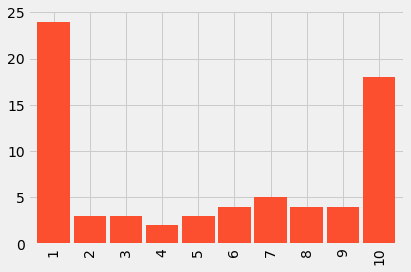

In [13]:
fake2 = pd.Series(
    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
     2, 2, 2, 
     3, 3, 3,
     4, 4,
     5, 5, 5,
     6, 6, 6, 6,
     7, 7, 7, 7, 7,
     8, 8, 8, 8,
     9, 9, 9, 9, 
     10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10])

fake2.value_counts().sort_index().plot.bar(color='C1', width=0.9);

## Annotate with text

Text(0, 0.5, 'Percent of Total Votes')

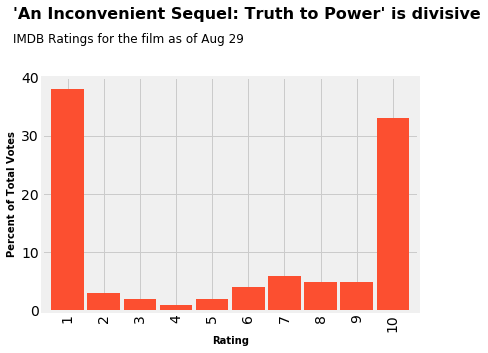

In [14]:
import numpy as np

plt.style.use('fivethirtyeight')

#creates white background
fig, ax = plt.subplots(facecolor='white')

fake.plot.bar(color='C1', width=0.9)

plt.text(x=-1.5, y=50, fontsize=16, fontweight='bold',
    s = "'An Inconvenient Sequel: Truth to Power' is divisive")
plt.text(x=-1.5, y=46, fontsize=12,
    s = "IMDB Ratings for the film as of Aug 29")

plt.yticks(range(0,41, 10))

plt.xlabel('Rating', fontsize=10, fontweight='bold')
plt.ylabel('Percent of Total Votes', fontsize=10, fontweight='bold')

## Reproduce with real data

In [15]:
df = pd.read_csv('https://raw.githubusercontent.com/fivethirtyeight/data/master/inconvenient-sequel/ratings.csv')
print(df.shape)
df.head()

(80053, 27)


,timestamp,respondents,category,link,average,mean,median,1_votes,2_votes,3_votes,4_votes,5_votes,6_votes,7_votes,8_votes,9_votes,10_votes,1_pct,2_pct,3_pct,4_pct,5_pct,6_pct,7_pct,8_pct,9_pct,10_pct
0,2017-07-17 12:28:32.785639,402,Males,http://www.imdb.com/title/tt6322922/ratings-male,4.6,5.0,2,197,7,7,3,7,7,11,8,20,135,49.0,1.7,1.7,0.7,1.7,1.7,2.7,2.0,5.0,33.6
1,2017-07-17 12:28:33.025600,78,Females,http://www.imdb.com/title/tt6322922/ratings-fe...,6.9,7.7,10,16,1,0,1,1,0,3,4,3,49,20.5,1.3,0.0,1.3,1.3,0.0,3.8,5.1,3.8,62.8
2,2017-07-17 12:28:33.273919,4,Aged under 18,http://www.imdb.com/title/tt6322922/ratings-age_1,4.2,4.2,3,2,0,0,0,1,0,0,0,0,1,50.0,0.0,0.0,0.0,25.0,0.0,0.0,0.0,0.0,25.0
3,2017-07-17 12:28:33.495325,4,Males under 18,http://www.imdb.com/title/tt6322922/ratings-ma...,4.2,4.2,3,2,0,0,0,1,0,0,0,0,1,50.0,0.0,0.0,0.0,25.0,0.0,0.0,0.0,0.0,25.0
4,2017-07-17 12:28:33.722849,130,Aged 18-29,http://www.imdb.com/title/tt6322922/ratings-age_2,6.3,6.5,9,41,0,3,1,2,3,6,4,6,64,31.5,0.0,2.3,0.8,1.5,2.3,4.6,3.1,4.6,49.2


In [16]:
df.category.value_counts()

IMDb staff            4216
Males                 4216
IMDb users            4216
Top 1000 voters       4216
Males Aged 30-44      4216
Females               4216
US users              4216
Females Aged 30-44    4216
Males Aged 45+        4216
Aged 18-29            4216
Aged under 18         4216
Females Aged 18-29    4216
Aged 45+              4216
Males under 18        4216
Males Aged 18-29      4216
Females Aged 45+      4216
Non-US users          4216
Aged 30-44            4216
Females under 18      4165
Name: category, dtype: int64

In [17]:
df.dtypes

timestamp       object
respondents      int64
category        object
link            object
average        float64
mean           float64
median           int64
1_votes          int64
2_votes          int64
3_votes          int64
4_votes          int64
5_votes          int64
6_votes          int64
7_votes          int64
8_votes          int64
9_votes          int64
10_votes         int64
1_pct          float64
2_pct          float64
3_pct          float64
4_pct          float64
5_pct          float64
6_pct          float64
7_pct          float64
8_pct          float64
9_pct          float64
10_pct         float64
dtype: object

In [18]:
df['timestamp'] = pd.to_datetime(df['timestamp'])
df['timestamp'].describe()

count                          80053
unique                         80053
top       2017-07-24 23:00:02.760781
freq                               1
first     2017-07-17 12:28:32.785639
last      2017-08-29 23:10:06.218251
Name: timestamp, dtype: object

In [19]:
df_imdb = df[df.category == 'IMDb users']
df_imdb.shape

(4216, 27)

In [20]:
final = df_imdb.tail(1)
final

,timestamp,respondents,category,link,average,mean,median,1_votes,2_votes,3_votes,4_votes,5_votes,6_votes,7_votes,8_votes,9_votes,10_votes,1_pct,2_pct,3_pct,4_pct,5_pct,6_pct,7_pct,8_pct,9_pct,10_pct
80052,2017-08-29 23:10:06.218251,2662,IMDb users,http://www.imdb.com/title/tt6322922/ratings,5.4,5.6,7,1021,69,38,25,55,110,154,147,146,897,38.4,2.6,1.4,0.9,2.1,4.1,5.8,5.5,5.5,33.7


In [21]:
#columns = ['{}_pct'.format(i) for i in range(1,11)]
columns = [f'{i}_pct' for i in range(1,11)]
columns

['1_pct',
 '2_pct',
 '3_pct',
 '4_pct',
 '5_pct',
 '6_pct',
 '7_pct',
 '8_pct',
 '9_pct',
 '10_pct']

In [22]:
data = final[columns]
data = data.T
data.index = range(1,11)
data

,80052
1,38.4
2,2.6
3,1.4
4,0.9
5,2.1
6,4.1
7,5.8
8,5.5
9,5.5
10,33.7


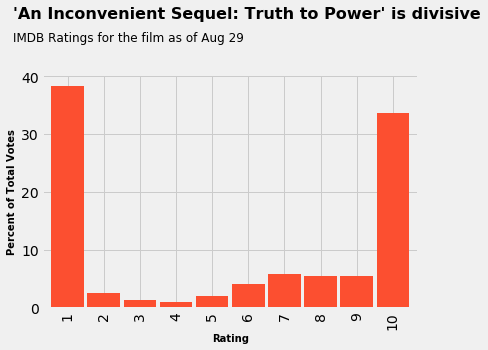

In [23]:
import numpy as np

plt.style.use('fivethirtyeight')

data.plot.bar(color='C1', width=0.9, legend=False)

plt.text(x=-1.5, y=50, fontsize=16, fontweight='bold',
    s = "'An Inconvenient Sequel: Truth to Power' is divisive")
plt.text(x=-1.5, y=46, fontsize=12,
    s = "IMDB Ratings for the film as of Aug 29")

plt.yticks(range(0,41, 10))

plt.xlabel('Rating', fontsize=10, fontweight='bold')
plt.ylabel('Percent of Total Votes', fontsize=10, fontweight='bold');

# ASSIGNMENT

Replicate the lesson code. I recommend that you [do not copy-paste](https://docs.google.com/document/d/1ubOw9B3Hfip27hF2ZFnW3a3z9xAgrUDRReOEo-FHCVs/edit).

# STRETCH OPTIONS

#### 1) Reproduce another example from [FiveThityEight's shared data repository](https://data.fivethirtyeight.com/).

#### 2) Reproduce one of the following using a library other than Seaborn or Matplotlib.

For example:
- [thanksgiving-2015](https://fivethirtyeight.com/features/heres-what-your-part-of-america-eats-on-thanksgiving/) (try the [`altair`](https://altair-viz.github.io/gallery/index.html#maps) library)
- [candy-power-ranking](https://fivethirtyeight.com/features/the-ultimate-halloween-candy-power-ranking/) (try the [`statsmodels`](https://www.statsmodels.org/stable/index.html) library)
- or another example of your choice!

#### 3) Make more charts!

Choose a chart you want to make, from [Visual Vocabulary - Vega Edition](http://ft.com/vocabulary).

Find the chart in an example gallery of a Python data visualization library:
- [Seaborn](http://seaborn.pydata.org/examples/index.html)
- [Altair](https://altair-viz.github.io/gallery/index.html)
- [Matplotlib](https://matplotlib.org/gallery.html)
- [Pandas](https://pandas.pydata.org/pandas-docs/stable/visualization.html)

Reproduce the chart. [Optionally, try the "Ben Franklin Method."](https://docs.google.com/document/d/1ubOw9B3Hfip27hF2ZFnW3a3z9xAgrUDRReOEo-FHCVs/edit) If you want, experiment and make changes.

Take notes. Consider sharing your work with your cohort!









In [24]:
pip install praw

In [0]:
import datetime as dt
import pandas as pd
import praw

fourteen_char = '9K9BpUVBzwl09w'
secret_key = 'vMa3KDc4h1YTASPTTFIgniu7fD4'
reddit_username = 'graphingthrowaway'
reddit_password = 'thisisapassword'


reddit = praw.Reddit(client_id=fourteen_char, \
                     client_secret=secret_key, \
                     user_agent='data_getter', \
                     username=reddit_username, \
                     password=reddit_password)


top_topics = reddit.subreddit('dataisbeautiful').top(limit=100)

topic_dict = {"Title": [],
              "Author": [],
              "Score": [], 
              "Id":[], 
              "Url": [], 
              "Created": []}


#goes through and adds information to the values in the topic_dict dictionary
for submission in top_topics:
    topic_dict['Title'].append(submission.title)
    topic_dict['Author'].append(str(submission.author))
    topic_dict['Score'].append(submission.score)
    topic_dict['Id'].append(submission.id)
    topic_dict['Url'].append(submission.url)
    topic_dict['Created'].append(submission.created_utc)
    
#creates dataframe from dict
df = pd.DataFrame.from_dict(topic_dict, orient='columns')

#fixes timestamp issues
def get_date(created):
    return dt.datetime.fromtimestamp(created).strftime("%Y-%m-%d %H:%M:%S")

df["Created"] = df["Created"].apply(get_date)
#turns the timestamps into datetime dtypes
df["Created"] = pd.to_datetime(df["Created"])


In [26]:
df.head()

,Title,Author,Score,Id,Url,Created
0,Let's hear it for the lurkers! The vast majori...,TrueBirch,108359,b5f9wi,https://i.redd.it/2731jdr3ibo21.png,2019-03-25 19:37:10
1,Cause of Death - Reality vs. Google vs. Media ...,aaronpenne,101452,8cwcbu,https://i.imgur.com/GtIzEok.gif,2018-04-17 13:02:52
2,Gaze and foot placement when walking over roug...,sandusky_hohoho,99613,8bzdr8,https://v.redd.it/h0f0m4v5nor01,2018-04-13 14:03:14
3,"11 different brands of AA batteries, tested in...",thecrispiestbacon,84420,855y7m,https://i.redd.it/aiuv4unoedm01.jpg,2018-03-17 19:13:26
4,The City is Alive: The Population of Manhattan...,citrusvanilla,76723,8hys9k,https://i.redd.it/gbc2fc9l5ow01.gif,2018-05-08 17:57:11


In [27]:
df['Created'].dtypes

dtype('<M8[ns]')

In [28]:
#things of interest: Tjukanov and datashown have had 3 of the top 100 posts
df['Author'].value_counts().head()

datashown      3
Tjukanov       3
Geographist    2
neilrkaye      2
labtec901      1
Name: Author, dtype: int64

In [41]:
import altair as alt

source = df

dib_chart = alt.Chart(source).mark_circle(size=60).encode(
    x='Created',
    y='Score',
    href='Url',
    color=alt.Color('Author', legend=None),
    tooltip=['Title', 'Author', 'Url', 'Created', 'Score']).interactive()

dib_chart.save('dib_chart.html')

dib_chart

Chart({
  data:                                                 Title  ...             Created
  0   Let's hear it for the lurkers! The vast majori...  ... 2019-03-25 19:37:10
  1   Cause of Death - Reality vs. Google vs. Media ...  ... 2018-04-17 13:02:52
  2   Gaze and foot placement when walking over roug...  ... 2018-04-13 14:03:14
  3   11 different brands of AA batteries, tested in...  ... 2018-03-17 19:13:26
  4   The City is Alive: The Population of Manhattan...  ... 2018-05-08 17:57:11
  5   Paths of 800 unmanned bicycles being pushed un...  ... 2018-01-22 19:59:01
  6   Pornhub traffic in Hawaii during the "missile ...  ... 2018-01-17 20:55:45
  7   Berlin Subway Map compared to it's real geogra...  ... 2017-05-15 13:32:13
  8   People killed in terrorist attacks in 2017: Eu...  ... 2017-10-25 08:05:03
  9   Optimal routes from the geographic center of t...  ... 2018-01-12 13:47:47
  10  Heatmap of numbers found at the end of Reddit ...  ... 2018-01-23 14:55:17
  11                         Gaussian distribution [OC]  ... 2018-01-06 18:55:19
  12  Cardiac Related Deaths During 2013 in the Cont...  ... 2017-11-17 20:15:45
  13  My daughters sleeping patterns for the first 4...  ... 2016-12-30 12:46:15
  14                                [OC] "My eyes hurt"  ... 2017-08-22 03:06:35
  15               Average flag colour by latitude [OC]  ... 2018-06-16 00:18:04
  16         Every Single Hour Of My 2017 Recorded [OC]  ... 2017-12-31 14:18:03
  17  Animating the Mercator projection to the true ...  ... 2018-10-12 13:57:04
  18               [OC] Percent of Air Per Bag of Chips  ... 2018-07-06 18:17:17
  19  Taylor Swift's Newfound Infatuation with Alcoh...  ... 2018-04-11 15:36:29
  20                        My 500 days on OkCupid [OC]  ... 2018-01-07 14:54:47
  21                               The Unit Circle [OC]  ... 2018-12-09 13:38:10
  22                        Double pendulum motion [OC]  ... 2018-02-04 16:07:36
  23             Population distribution in Canada [OC]  ... 2018-06-08 19:51:02
  24  Ratio of land and sea at different latitudes [OC]  ... 2018-11-30 13:47:12
  25  [OC] I've secretly been keeping track of my co...  ... 2017-08-02 11:02:34
  26                      Chance of Death per Year [OC]  ... 2018-01-31 12:14:12
  27         100 years of hurricane paths animated [OC]  ... 2017-09-04 14:01:18
  28  Searches for International Men's Day peak ever...  ... 2018-03-08 09:54:42
  29  Combined faces of top 500 professional golfers...  ... 2017-10-03 15:46:53
  ..                                                ...  ...                 ...
  70       100 Historic Lives, through the decades [OC]  ... 2018-11-21 13:39:52
  71                   Here's How America Uses Its Land  ... 2018-07-31 13:03:24
  72  Age Distribution for the 10 Largest Countries ...  ... 2017-09-22 13:25:26
  73   USA vs. Russia Arms Sales from 1950 to 2017 [OC]  ... 2018-08-27 13:24:32
  74  "Fuuuuck", orthographic repetition on Twitter ...  ... 2017-08-05 00:52:15
  75    Countries with the Largest Defense Budgets [OC]  ... 2017-03-01 12:48:59
  76  You're as likely to get a job interview meetin...  ... 2018-11-27 14:05:40
  77                          [OC] My 28 Days on Tinder  ... 2018-03-12 09:56:16
  78    Top 10 downvoted comments, adjusted for EA [OC]  ... 2017-11-14 09:35:54
  79  Heat Map of 1,058,383 Basketball Shots from NC...  ... 2018-03-09 16:04:03
  80  61% of "Entry-Level" Jobs Require 3+ Years of ...  ... 2018-03-28 14:01:38
  81  Timelapse of Hurricane Irma predictions vs act...  ... 2017-09-09 09:48:20
  82  Netflix Employees Are Happier With Their Job T...  ... 2017-11-03 13:27:20
  83  Internetspeed me and my roommates pay and what...  ... 2018-01-15 16:24:50
  84  Daily charted my weight loss of 100 lbs over 1...  ... 2018-02-07 16:53:58
  85  In his first 10 months, Trump told nearly six ...  ... 2017-12-14 17:44:50
  86               [OC] Film Genre Popularity 1910-2018  ... 2019-01-15 13:02:27
  87  1% of all c